In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 假设你的数据集路径是 'your_dataset.csv'
# 加载数据集
ds = pd.read_csv('3_clean.csv')
data = ds
# 预览数据

print(data.head())

# 获取描述性统计信息
print(data.describe())

      timestamp_call_key  retailer_code       serial  reason  \
0  240315173250 DAL1OA3M              0  10010009499       0   
1  240315124742 DAL15XHK              1  10006021998       1   
2  240317114237 DAL3BLK6              2  10016007830       2   
3  240314120849 PHX6PL4U              1  10008003199       1   
4  240314145902 DAL68RYS              3  10013002037       1   

                    mos  resolved  no_of_accounts_with_syf_13_march  \
0              IA PP TR         0                               1.0   
1        IA BA TS nl TR         1                               2.0   
2  IA AA BA MR nl PT TR         0                              12.0   
3                 IA BA         0                               2.0   
4     IA BA TS nl mm TR         1                               6.0   

   account_balance_13_march  delinquency_history_13_march  \
0                       NaN                             0   
1                    143.28                             0   
2    

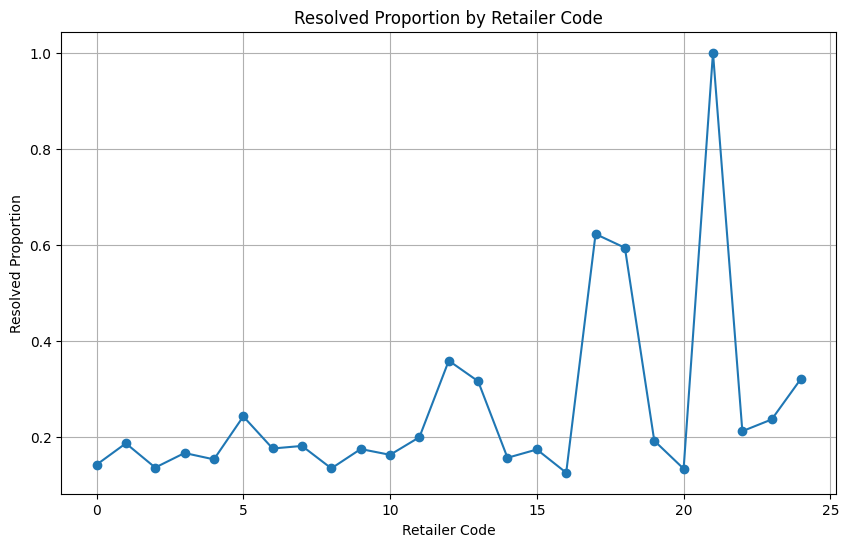

In [4]:
n = data['retailer_code'].max()  # 假设 retailer_code 的最大值代表 n

# 初始化存储比例的字典
resolved_proportions = []

# 遍历每个 retailer_code 并计算比例
for code in range(n + 1):
    filtered_data = data[data['retailer_code'] == code]
    if not filtered_data.empty:
        resolution_counts = filtered_data['resolved'].value_counts(
            normalize=True)
        # 假设解决状态为 1 表示未解决，0 表示已解决
        resolved_proportion = resolution_counts.get(1, 1)  # 获取已解决的比例，默认为0
        resolved_proportions.append(resolved_proportion)
    else:
        resolved_proportions.append(0)  # 如果没有数据则比例为0

# 绘制比例变化曲线
plt.figure(figsize=(10, 6))
plt.plot(range(n + 1), resolved_proportions, marker='o', linestyle='-')
plt.title('Resolved Proportion by Retailer Code')
plt.xlabel('Retailer Code')
plt.ylabel('Resolved Proportion')
plt.grid(True)
plt.show()

Resolution proportions for retailer_code 4:
1    0.622549
0    0.377451
Name: resolved, dtype: float64
Number of rows: 204


/var/folders/n3/9v769jj55rld65nb6w48_rgc0000gn/T/ipykernel_89792/4207078905.py:22: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = unresolved_data.drop('resolved', axis=1).corr()


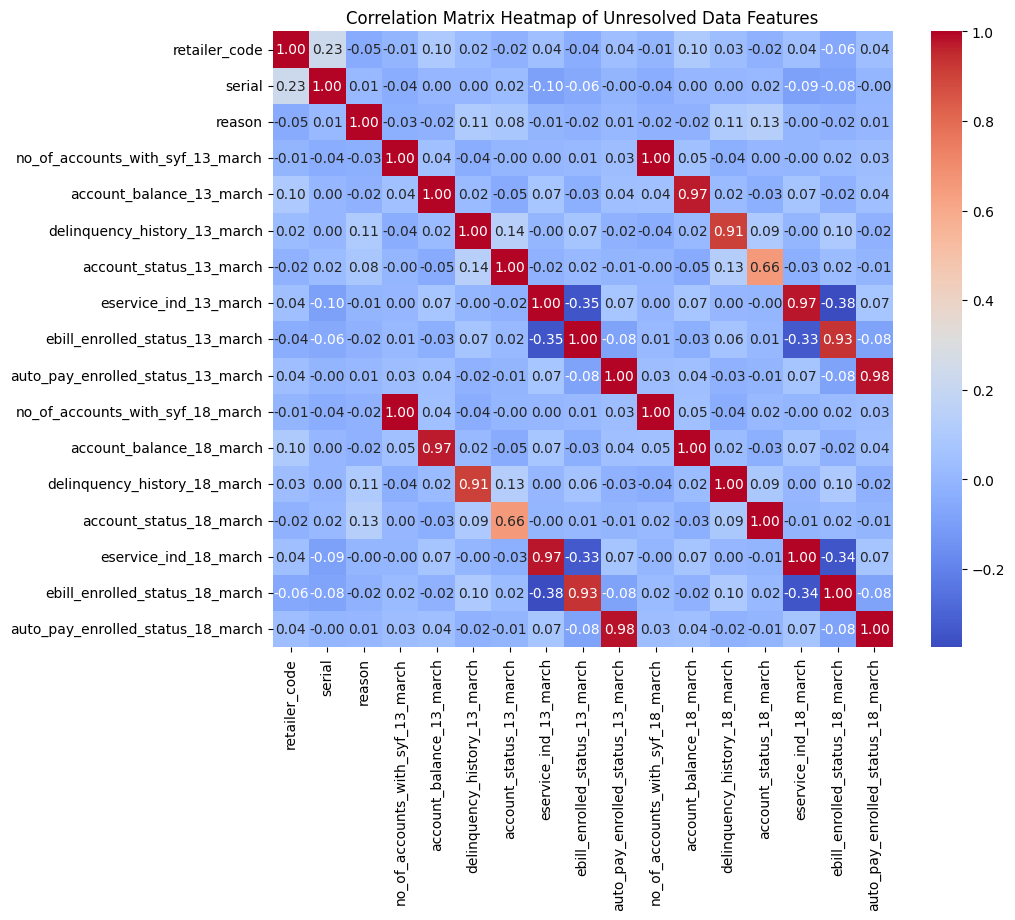

In [6]:
filtered_data = data[data['retailer_code'] == 17]

# 计算解决和未解决的数量
resolution_counts = filtered_data['resolved'].value_counts()

# 计算比例
resolution_proportions = resolution_counts / resolution_counts.sum()

# 输出结果
print("Resolution proportions for retailer_code 4:")
print(resolution_proportions)

retailer_code_count = data['retailer_code'].value_counts().get(17, 0)

print(f"Number of rows: {retailer_code_count}")





unresolved_data = data[data['resolved'] == 1]
corr = unresolved_data.drop('resolved', axis=1).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, 'cmap'='coolwarm' , fmt=".2f")
plt.title('Correlation Matrix Heatmap of Unresolved Data Features')
plt.show()




In [5]:
filtered_data = data[data['retailer_code'] == 17]

# 获取这些行的 'mos' 值
mos_values = filtered_data['mos']
mos_values

3120      IA BA MR nl mm mo mt RS TR
21536                 IA BA TS nl TR
21537        IA BA TS nl mm mt RS TR
21538           IA BA TS nl mt RS TR
30711                       IA PP TR
                     ...            
873436                      IA PP TR
879939       IA PI BA TS nl mt RS TR
881472             IA BA TS nl PT TR
901943                         IA BA
901944                IA BA nl PT TR
Name: mos, Length: 204, dtype: object

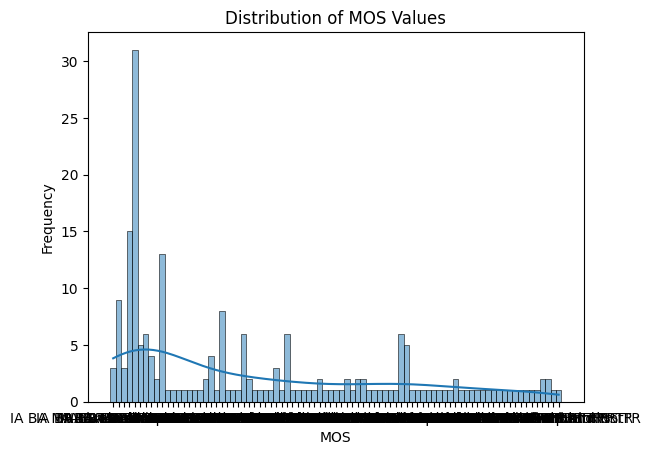

In [6]:
sns.histplot(mos_values, kde=True)
plt.title('Distribution of MOS Values')
plt.xlabel('MOS')
plt.ylabel('Frequency')
plt.show()